[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/real-itu/modern-ai-course/blob/master/lecture-04/lab.ipynb)

# Lab 2 - Math



### Stats

You're given the following dataset:



In [1]:
import random
random.seed(0)
x = [random.gauss(0, 1)**2 for _ in range(20)]
print(x)

[0.8868279034128675, 1.9504304025306558, 0.46201173092655257, 0.13727289350107572, 1.0329650747173147, 0.00520129768651921, 0.032111381051647944, 0.6907259056240523, 1.713578821550704, 0.037592456206679545, 0.9865449735727571, 0.418585230265908, 0.11133432341026718, 2.7082355435792898, 0.3123577703699347, 0.26435707416151544, 5.779789763931721, 2.344213906200638, 0.6343578347545124, 4.014607380283022]


> Compute the min, max, mean, median, standard deviation and variance of x


In [2]:
# Your code here
#import numpy
#import statistics

#min=numpy.min(x)
#max=numpy.max(x)

min=x[0]
max=x[0]
sum=0
for n in x:
  sum+=n
  if n > max:
    max = n
  if n< min:
    min=n
avg=sum/len(x)

print("the minimum is: "+ str(min))
print("the maximum is: "+ str(max))
print("the average is: "+ str(avg))


#median=statistics.median(x)
xs=sorted(x)
if len(x)%2==0:
  median=( xs[int(len(x) / 2 -1)]+xs[int(len(x)//2)])/2
else:
  median= xs[len(x)/2]

print("the median is: "+str(median))

#std=statistics.stdev(x)
mds=[(n-avg)**2 for n in x]
tot=0
for i in range(len(mds)):
  tot+=mds[i]
std=(tot/(len(x)-1))**0.5
print("the standard deviation is: "+ str(std))

#var=statistics.variance(x)
var=tot/len(x)
print("the variance is: "+ str(var))


the minimum is: 0.00520129768651921
the maximum is: 5.779789763931721
the average is: 1.2261550833868817
the median is: 0.6625418701892823
the standard deviation is: 1.5099742213349252
the variance is: 2.166021041641213


### Vectors

You're given the two 3 dimensional vectors a and b below.

In [3]:
a = [1, 3, 5]
b = [2, 9, 13]

> Compute
  1. $a + b$
  2. $2a-3b$
  3. $ab$ - the inner product



In [4]:
# Your code here
sum=[a[i]+b[i] for i in range(len(a))]
print("a+b=", sum)

sum2=[2*a[i]-3*b[i] for i in range(len(a))]
print("2a-3b=", sum2)

#innerProduct=a @ b works only if a and b are vectors
if len(a)!=len(b):
  raise SyntaxError("a and b needs to be the same size to do the inner product")

product= [a[i]*b[i] for i in range(len(a))]
innerProduct=0
for i in range(len(product)):
  innerProduct+=product[i]
print("ab=", innerProduct)


a+b= [3, 12, 18]
2a-3b= [-4, -21, -29]
ab= 94


### Matrices

Here are two matrices:

In [5]:
A = [[random.randint(0, 7) for _ in range(5)] for _ in range(5)]
B = [[random.randint(0, 7) for _ in range(5)] for _ in range(5)]

A, B

([[4, 1, 1, 5, 7],
  [1, 5, 6, 5, 3],
  [7, 7, 4, 0, 0],
  [1, 6, 0, 7, 5],
  [3, 5, 1, 3, 3]],
 [[3, 2, 7, 1, 1],
  [5, 7, 1, 4, 4],
  [1, 5, 3, 4, 7],
  [1, 6, 5, 3, 4],
  [2, 3, 2, 0, 4]])

Compute $AB$ and $BA$

In [6]:
# your code
#AB=numpy.dot(A,B)
#BA=numpy.dot(B,A)

if len(A[0]) != len(B):
    raise ValueError("wrong matrix dimension")

AB=[[0 for j in range(len(B[0]))] for i in range(len(A))]
for i in range(len(A)):
  for j in range(len(B[0])):
    for k in range(len(B)):
      AB[i][j]+=A[i][k]*B[k][j]


if len(B[0]) != len(A):
    raise ValueError("wrong matrix dimension")

BA=[[0 for j in range(len(A[0]))] for i in range(len(B))]
for i in range(len(B)):
  for j in range(len(A[0])):
    for k in range(len(A)):
      BA[i][j]+=B[i][k]*A[k][j]

print("AB=", AB)
print("BA=",BA)


AB= [[37, 71, 71, 27, 63], [45, 106, 61, 60, 95], [60, 83, 68, 51, 63], [50, 101, 58, 46, 73], [44, 73, 50, 36, 54]]
BA= [[67, 73, 44, 35, 35], [50, 91, 55, 100, 88], [55, 106, 50, 79, 63], [60, 104, 61, 68, 52], [37, 51, 32, 37, 35]]


### Gradients

Given the function $f(x,y) = 3x^2 + 6y$

> Compute the partial gradients $\frac{df}{dx}$ and $\frac{df}{dy}$



Your answer here:

df/dx=6x

df/dy=6

The function above corresponds to the following computational graph

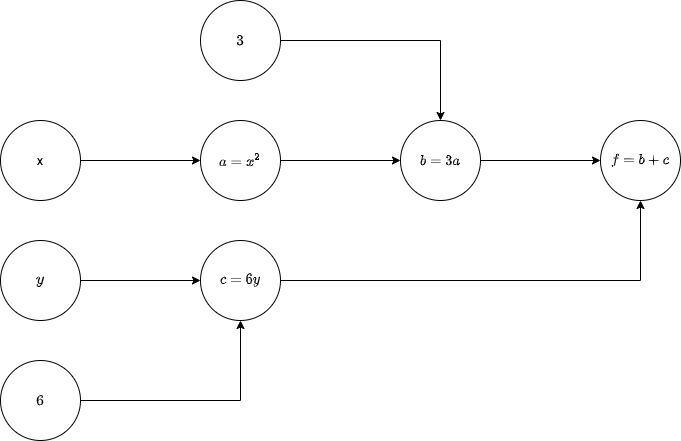

> Denote each arrow with the corresponding partial gradient, e.g. $\frac{df}{dc} = 1$ between $f$ and $c$, and use the generalized chain rule on graphs to compute the gradients $\frac{df}{dc}$, $\frac{df}{db}$, $\frac{df}{da}$, $\frac{df}{dx}$, $\frac{df}{dy}$.



Your answer here

df/dc=1

df/db=1

df/da=3

df/dx=6x

df/dy=6

### Autodiff

This exercise is quite hard. It's OK if you don't finish it, but you should try your best!

In [7]:
def parents_grads(node):
    """
    returns parents of node and the gradients of node w.r.t each parent
    e.g. in the example graph above parents_grads(f) would return: [(b, df/db), (c, df/dc)]
    """

> Complete the `backprop` method below to create a recursive algorithm such that calling `backward(node)` computes the gradient of `node` w.r.t. every (upstream - to the left) node in the computational graph. Every node has a `node.grad` attribute that is initialized to `0.0`, it's numerical gradient. The algorithm should modify this property directly, it should not return anything. Assume the gradients from `parents_grads` can be treated like real numbers, so you can e.g. multiply and add them.

In [8]:
def backprop(node, df_dnode):
    node.grad += df_dnode
    # Your code here
    for (p,df) in parents_grads(node):
      newgrad=node.grad*df
      backprop(p, newgrad)


def backward(node):
    """
    Computes the gradient of every (upstream) node in the computational graph w.r.t. node.
    """
    backprop(node, 1.0) # The gradient of a node w.r.t. itself is 1 by definition.


Ok, now let's try to actually make it work! We'll define a class `Node` which contains the node value, gradient and parents and their gradients

In [9]:
from typing import Sequence, Tuple

class Node:
    def __init__(self, value: float, parents_grads: Sequence[Tuple['Node', float]]):
        self.value = value
        self.grad = 0.0
        self.parents_grads = parents_grads

    def __repr__(self):
        return "Node(value=%.4f, grad=%.4f)"%(self.value, self.grad)

So far no magic. We still havn't defined how we get the `parents_grads`, but we'll get there. Now move the `backprop` and `grad` function into the class, and modify it so it works with the class.

In [10]:
# Your code here
class Node:
    def __init__(self, value: float, parents_grads: Sequence[Tuple['Node', float]]):
        self.value = value
        self.grad = 0.0
        self.parents_grads = parents_grads

    def __repr__(self):
        return "Node(value=%.4f, grad=%.4f)"%(self.value, self.grad)

    def backprop(self, d):
        self.grad += d
        for [p,df] in self.parents_grads:
          newgrad=self.grad*df
          p.backprop(newgrad)

    def backward(self):
        self.backprop(1.0)


Now let's create a simple graph: $y = x^2$, and compute it for $x=2$. We'll set the parent_grads directly based on our knowledge that $\frac{dx^2}{dx}=2x$

In [11]:
x = Node(2.0, [])
y = Node(x.value**2, parents_grads=[(x, 2*x.value)])

And print the two nodes

In [12]:
print("x", x, "y", y)

x Node(value=2.0000, grad=0.0000) y Node(value=4.0000, grad=0.0000)


> Verify that the `y.backward()` call below computes the correct gradients

In [13]:
y.backward()
print("x", x, "y", y)

x Node(value=2.0000, grad=4.0000) y Node(value=4.0000, grad=1.0000)


$\frac{dy}{dx}$ should be 4 and $\frac{dy}{dy}$ should be 1

Ok, so it seems to work, but it's not very easy to use, since you have to

1.   List item
2.   List item

define all the `parents_grads` whenever you're creating new nodes. **Here's the trick.** We can make a function `square(node:Node)->Node` which can square any Node. See below

In [14]:
def square(node: Node) -> Node:
    return Node(node.value**2, [(node, 2*node.value)])

Let's verify that it works

In [15]:
x = Node(3.0, [])
y = square(x)
print("x", x, "y", y)
y.backward()
print("x", x, "y", y)

x Node(value=3.0000, grad=0.0000) y Node(value=9.0000, grad=0.0000)
x Node(value=3.0000, grad=6.0000) y Node(value=9.0000, grad=1.0000)


Now we're getting somewhere. These calls to square can of course be chained

In [16]:
x = Node(3.0, [])
y = square(x)
z = square(y)
print("x", x, "y", y, "z", z)
z.backward()
print("x", x, "y", y,"z", z)

x Node(value=3.0000, grad=0.0000) y Node(value=9.0000, grad=0.0000) z Node(value=81.0000, grad=0.0000)
x Node(value=3.0000, grad=108.0000) y Node(value=9.0000, grad=18.0000) z Node(value=81.0000, grad=1.0000)


> Compute the $\frac{dz}{dx}$ gradient by hand and verify that it's correct

Your answer here

dz/dx=4*x^3=108

Similarly we can create functions like this for all the common operators, plus, minus, multiplication, etc. With enough base operators like this we can create any computation we want, and compute the gradients automatically with `.backward()`

> Finish the plus function below and verify that it works

In [17]:
def plus(a: Node, b:Node)->Node:
  # Your code here
  s =[(a,1),(b,1)]
  return Node(a.value+b.value, s)

In [18]:
x = Node(4.0, [])
y = Node(5.0, [])
z = plus(x, y)
print("x", x, "y", y, "z", z)
z.backward()
print("x", x, "y", y,"z", z)

x Node(value=4.0000, grad=0.0000) y Node(value=5.0000, grad=0.0000) z Node(value=9.0000, grad=0.0000)
x Node(value=4.0000, grad=1.0000) y Node(value=5.0000, grad=1.0000) z Node(value=9.0000, grad=1.0000)


> Finish the multiply function below and verify that it works:

In [19]:
def multiply(a: Node, b:Node)->Node:
    """
    Computes a*b
    """
    # Your code hre
    s =[(a,b.value),(b,a.value)]
    return Node(a.value*b.value, s)

In [20]:
x = Node(4.0, [])
y = Node(5.0, [])
z = multiply(x, y)
print("x", x, "y", y, "z", z)
z.backward()
print("x", x, "y", y,"z", z)

x Node(value=4.0000, grad=0.0000) y Node(value=5.0000, grad=0.0000) z Node(value=20.0000, grad=0.0000)
x Node(value=4.0000, grad=5.0000) y Node(value=5.0000, grad=4.0000) z Node(value=20.0000, grad=1.0000)


We'll stop here, but with just a few more functions we could compute a lot of common computations, and get their gradients automatically!

This is super nice, but it's kind of annoying having to write `plus(a,b)`. Wouldn't it be nice if we could just write `a+b`? With python operator overloading we can! If we define the `__add__` method on `Node`, this will be executed instead of the regular plus operation when we add something to a `Node`.

> Modify the `Node` class so that it overload the plus, `__add__(self, other)`, and multiplication, `__mul__(self, other)`, operators and run the code below to verify that it works.

In [21]:
# Your code here
class Node:
    def __init__(self, value: float, parents_grads: Sequence[Tuple['Node', float]]):
        self.value = value
        self.grad = 0.0
        self.parents_grads = parents_grads

    def __repr__(self):
        return "Node(value=%.4f, grad=%.4f)"%(self.value, self.grad)

    def backprop(self, d):
        self.grad += d
        for [p,df] in self.parents_grads:
          newgrad=self.grad*df
          p.backprop(newgrad)

    def backward(self):
        self.backprop(1.0)

    def __add__(self, other)->Node:
        s =[(self,1),(other,1)]
        return Node(self.value+other.value, s)

    def __mul__(self, other)->Node:
        s =[(self,other.value),(other,self.value)]
        return Node(self.value*other.value, s)


In [22]:
a = Node(2.0, [])
b = Node(3.0, [])
c = Node(4.0, [])
d = a*b + c # Behold the magic of operator overloading!
print("a", a, "b", b, "c", c, "d", d)
d.backward()
print("a", a, "b", b, "c", c, "d", d)

a Node(value=2.0000, grad=0.0000) b Node(value=3.0000, grad=0.0000) c Node(value=4.0000, grad=0.0000) d Node(value=10.0000, grad=0.0000)
a Node(value=2.0000, grad=3.0000) b Node(value=3.0000, grad=2.0000) c Node(value=4.0000, grad=1.0000) d Node(value=10.0000, grad=1.0000)


Congratulations, you've made your own tiny library for autodiff! That's really an awesome achievement!

Now, I wouldn't recommend using your library for anything other than a tool to understand the inner workings of autodiff. Extremely good libraries already exist, which has a lot of functions defined and are super-duper optimized and can even run on specialized hardware like GPUs. Some of those libraries are [PyTorch](https://pytorch.org/), [Tensorflow](https://www.tensorflow.org/) and [Jax](https://github.com/google/jax).